## Project Title - Mushroom Classification
## Technologies - Machine Learning Technology
## Domain - Agriculture

### Problem Statement:
The Audubon Society Field Guide to North American Mushrooms contains descriptions
of hypothetical samples corresponding to 23 species of gilled mushrooms in the
Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either
definitely edible, definitely poisonous, or maybe edible but not recommended. This last
category was merged with the toxic category. The Guide asserts unequivocally that
there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it
be" for Poisonous Oak and Ivy.
The main goal is to predict which mushroom is poisonous & which is edible.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()
from sklearn_pandas import CategoricalImputer

In [4]:
data = pd.read_csv("mushrooms.csv")

In [5]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [6]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [7]:
data.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

Data Description: This dataset describes mushrooms in terms of their physical characteristics. They are classified into: poisonous or edible.

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [8]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

there are no missing vlaues in our data. But when we go through the data, we find that missing values in one column is replaced with '?'.

In [9]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        print(column, data[column][data[column]=='?'].count()) 

stalk-root 2480


there are 2480 missing values in "stalk-root" column. Let's replace such values with numpy "nan" so that we can handle the missing values

In [10]:
data["stalk-root"] =data["stalk-root"].replace('?',np.nan)  

In [11]:
data.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
now we can see the missing values in the stalk-root column. we will impute these missing values.

In [12]:
for column in data.columns:
    print(column,data[column].nunique()) 

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


 "veil-type" column has only one unique category. This column won't give much information, let's drop it

In [13]:
data = data.drop(['veil-type'],axis=1)

In [21]:
Let impute the missing values. We will use CategoricalImputer method present in sklearn_pandas package.


In [1]:
imputer = CategoricalImputer()
for col in data.columns:
    data[col] = imputer.fit_transform(data[col])

NameError: name 'CategoricalImputer' is not defined

In [26]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
the missing values have been imputed and there are no missing values now.

In [28]:
for column in data.columns:
    data[column] = data[column].apply(lambda x: "'" + str(x) + "'")

In [29]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0   'p'       'x'         's'       'n'     't'  'p'             'f'   
1   'e'       'x'         's'       'y'     't'  'a'             'f'   
2   'e'       'b'         's'       'w'     't'  'l'             'f'   
3   'p'       'x'         'y'       'w'     't'  'p'             'f'   
4   'e'       'x'         's'       'g'     'f'  'n'             'f'   

  gill-spacing gill-size gill-color  ... stalk-surface-above-ring  \
0          'c'       'n'        'k'  ...                      's'   
1          'c'       'b'        'k'  ...                      's'   
2          'c'       'b'        'n'  ...                      's'   
3          'c'       'n'        'n'  ...                      's'   
4          'w'       'b'        'k'  ...                      's'   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                      's'                    'w'                    'w'   
1                      's'                    'w'                    'w'   
2                      's'                    'w'                    'w'   
3                      's'                    'w'                    'w'   
4                      's'                    'w'                    'w'   

  veil-color ring-number ring-type spore-print-color population habitat  
0        'w'         'o'       'p'               'k'        's'     'u'  
1        'w'         'o'       'p'               'n'        'n'     'g'  
2        'w'         'o'       'p'               'n'        'n'     'm'  
3        'w'         'o'       'p'               'k'        's'     'u'  
4        'w'         'o'       'e'               'n'        'a'     'g'  

[5 rows x 22 columns]

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stalk-root', ylabel='count'>

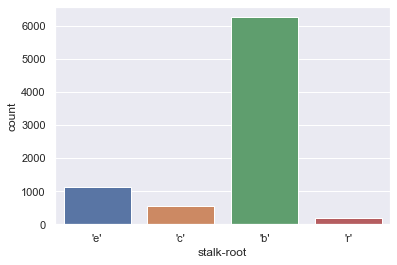

In [31]:
sns.countplot(data["stalk-root"])

In [34]:
for column in data.columns:
    print(column,data[column].nunique())

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


We will map columns "class". we are mapping class column, so we can easily return the actual value during prediction. We will use get dumies for rest of the columns.

In [35]:
data["class"] = data["class"].map({"'p'" : 0, "'e'" : 1})

In [36]:
for column in data.drop(['class'],axis=1).columns:
    data = pd.get_dummies(data, columns=[column], drop_first=True)

In [37]:
data

class  cap-shape_'c'  cap-shape_'f'  cap-shape_'k'  cap-shape_'s'  \
0         0              0              0              0              0   
1         1              0              0              0              0   
2         1              0              0              0              0   
3         0              0              0              0              0   
4         1              0              0              0              0   
...     ...            ...            ...            ...            ...   
8119      1              0              0              1              0   
8120      1              0              0              0              0   
8121      1              0              1              0              0   
8122      0              0              0              1              0   
8123      1              0              0              0              0   

      cap-shape_'x'  cap-surface_'g'  cap-surface_'s'  cap-surface_'y'  \
0                 1                0                1                0   
1                 1                0                1                0   
2                 0                0                1                0   
3                 1                0                0                1   
4                 1                0                1                0   
...             ...              ...              ...              ...   
8119              0                0                1                0   
8120              1                0                1                0   
8121              0                0                1                0   
8122              0                0                0                1   
8123              1                0                1                0   

      cap-color_'c'  ...  population_'n'  population_'s'  population_'v'  \
0                 0  ...               0               1               0   
1                 0  ...               1               0               0   
2                 0  ...               1               0               0   
3                 0  ...               0               1               0   
4                 0  ...               0               0               0   
...             ...  ...             ...             ...             ...   
8119              0  ...               0               0               0   
8120              0  ...               0               0               1   
8121              0  ...               0               0               0   
8122              0  ...               0               0               1   
8123              0  ...               0               0               0   

      population_'y'  habitat_'g'  habitat_'l'  habitat_'m'  habitat_'p'  \
0                  0            0            0            0            0   
1                  0            1            0            0            0   
2                  0            0            0            1            0   
3                  0            0            0            0            0   
4                  0            1            0            0            0   
...              ...          ...          ...          ...          ...   
8119               0            0            1            0            0   
8120               0            0            1            0            0   
8121               0            0            1            0            0   
8122               0            0            1            0            0   
8123               0            0            1            0            0   

      habitat_'u'  habitat_'w'  
0               1            0  
1               0            0  
2               0            0  
3               1            0  
4               0            0  
...           ...          ...  
8119            0            0  
8120            0            0  
8121            0            0  
8122            0            0  
8123            0          

In [40]:
len(data.columns)

95

In [ ]:
the number of columns have increased because of get dummies.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

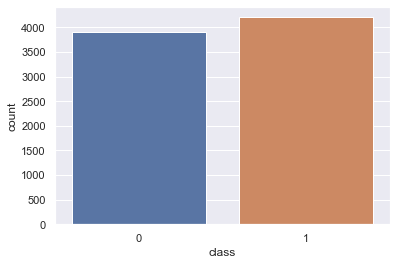

In [41]:
sns.countplot(data['class'])

our dataset looks pretty balanced. So we are good to go with starting our model training!!!